## Exercice : Calcul d'une intégrale d'une fonction normale

Dans cet exercice, nous allons approximer manuellement l'intégrale d'une densité de probabilité normale standard entre deux bornes, puis comparer notre résultat avec la valeur obtenue à l'aide de `scipy`.

On considère la fonction de densité suivante :

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
$$

C'est la densité d'une loi normale centrée réduite.

Nous allons calculer l'intégrale définie suivante :

$$
I = \int_{a}^{b} f(x)\, dx
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad


## Affichage de l'air recherchée

In [4]:
# Définition de la fonction normale standard
def f(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-x**2 / 2)

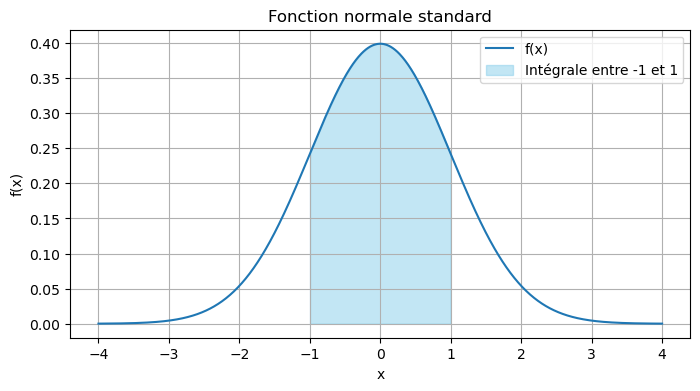

In [6]:
# Choix des bornes
a = -1
b = 1

# Tracé de la fonction
x = np.linspace(-4, 4, 1000)
y = f(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label="f(x)")
plt.fill_between(x, y, where=(x >= a) & (x <= b), color='skyblue', alpha=0.5, label=f"Intégrale entre {a} et {b}")
plt.title("Fonction normale standard")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

On cherche ici à calculer l'aire entre la courbe de la fonction de densité et l'axe des abscisses entre les bornes `a=-1` et `b=1`. On trace donc la fonction de densité et on colorie en bleu ici l'intervalle `[-1, 1]`.

# Méthode manuelle (approximation par la méthode des rectangles)


La méthode des rectangles consiste à diviser l'intervalle \([a, b]\) en \(n\) sous-intervalles de largeur \(\Delta x = \frac{b-a}{n}\). Pour chaque sous-intervalle, on évalue la fonction \(f(x)\) à un point (généralement le point gauche ou le point droit du sous-intervalle) et on multiplie par la largeur du sous-intervalle pour obtenir une approximation de l'aire.

In [30]:
n = 1000  # nombre de rectangles
x_vals = np.linspace(a, b, n+1)
dx = (b - a) / n
approx_integrale = np.sum(f(x_vals) * dx)

print(f"Valeur approchée de l'intégrale entre {a} et {b} : {approx_integrale:.6f}")

Valeur approchée de l'intégrale entre -1 et 1 : 0.683173


## Visualisation avec un petit nombre de rectangles


In [35]:

def afficher_n_rectangles(n):
    a, b = -1, 1
    x_plot = np.linspace(-4, 4, 1000)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x_plot, f(x_plot), label="f(x)")

    dx = (b - a) / n
    colors = plt.cm.viridis(np.linspace(0, 1, n))

    for i, c in zip(range(n), colors):
        x_left = a + i * dx
        x_sample = x_left + dx/2

        height = f(x_sample)
        ax.bar(x_left, height, width=dx, align="edge",
               color=c, alpha=0.5, edgecolor="black")

    ax.set(title=f"Méthode des rectangles — n={n}",
           xlabel="x", ylabel="f(x)")
    ax.grid(True)
    plt.show()

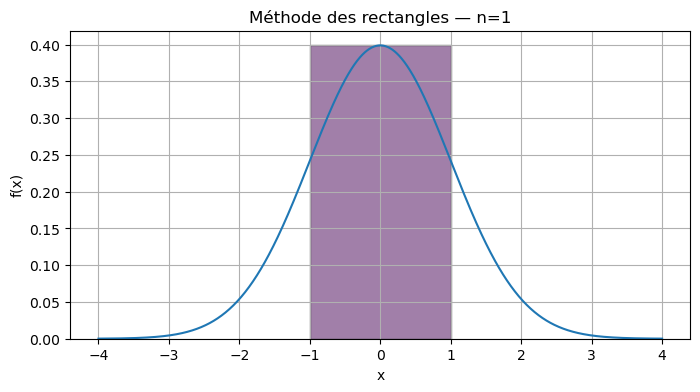

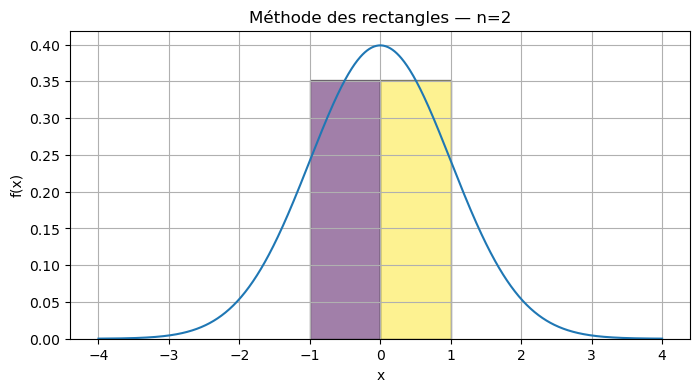

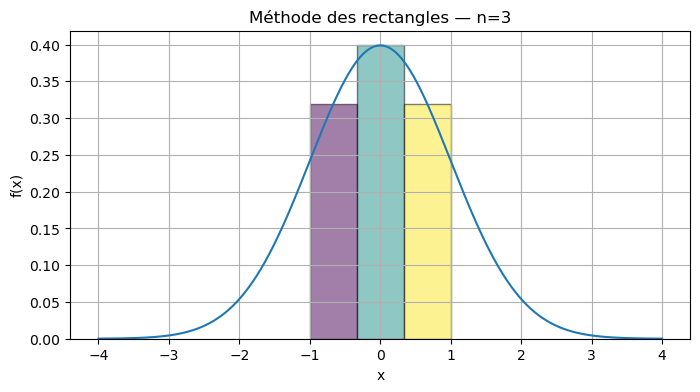

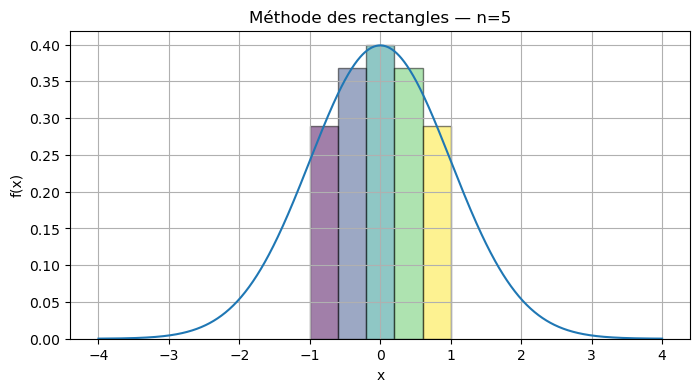

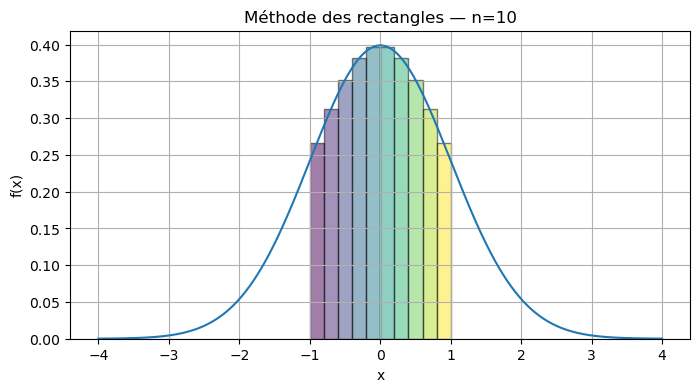

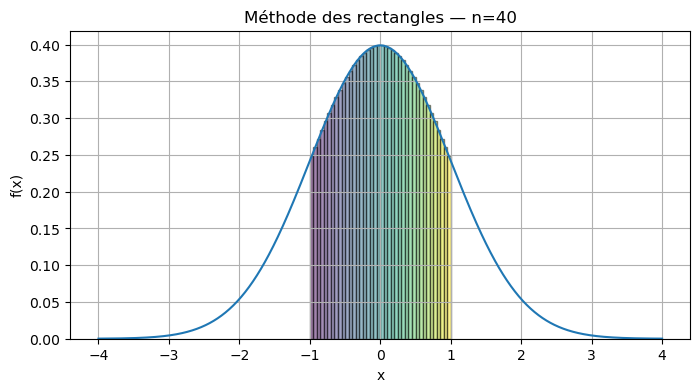

In [36]:
for number_of_rect in [1, 2, 3, 5, 10, 40]:
    afficher_n_rectangles(number_of_rect)

# Comparaison avec la méthode numérique exacte (scipy)

In [31]:
result, _ = quad(f, a, b)
print(f"Valeur réelle (scipy) de l'intégrale entre {a} et {b} : {result:.6f}")
print(f"Erreur absolue entre l'approximation et la valeur réelle : {abs(approx_integrale - result):.6f}")

Valeur réelle (scipy) de l'intégrale entre -1 et 1 : 0.682689
Erreur absolue entre l'approximation et la valeur réelle : 0.000484
